In [1]:
import pandas as pd


In [2]:
from google.colab import files

# Upload file
uploaded = files.upload()


Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [19]:
X= df.drop(columns=['CustomerID'])

In [21]:
categorical_cols = X.select_dtypes(include='object').columns
print(categorical_cols)


Index(['Genre'], dtype='object')


In [23]:
for col in categorical_cols:
    X[col] = X[col].astype('category').cat.codes


In [25]:
print(df.columns)
print(X.columns)


Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


In [27]:
print(X['Genre'].unique())


[1 0]


In [28]:
X = pd.get_dummies(X, columns=['Genre'], drop_first=True)


In [29]:
import matplotlib.pyplot as plt


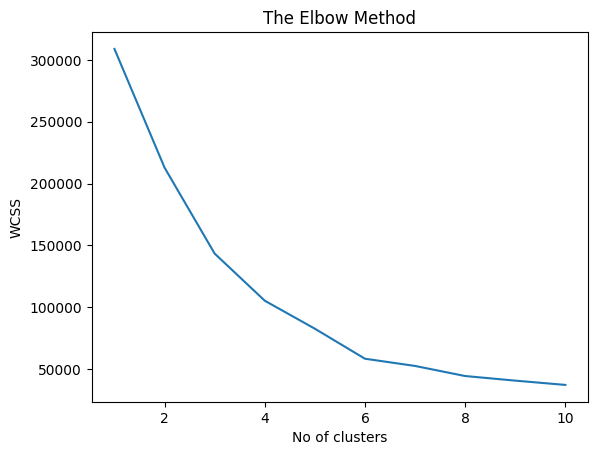

In [30]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++', random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("No of clusters")
plt.ylabel("WCSS")
plt.show()

In [31]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(X)

In [32]:
y_kmeans

array([2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4,
       4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 4, 4, 4, 0, 0, 4, 0, 4, 4, 4, 4, 4,
       4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 0,
       0, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 1, 4, 1, 4, 1, 3, 1, 3, 1,
       4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'magneta'

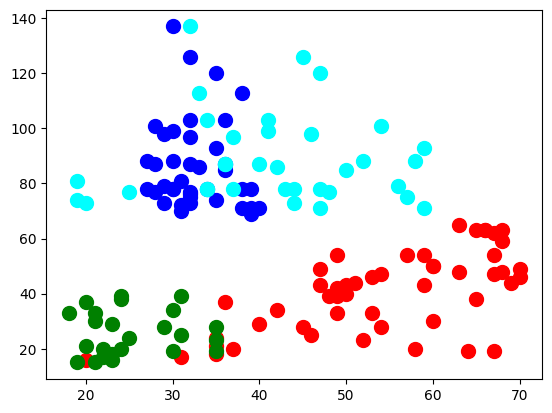

In [34]:
plt.scatter(X.iloc[y_kmeans == 0,0], X.iloc[y_kmeans == 0,1], s=100, c='red', label='Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1,0], X.iloc[y_kmeans == 1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2,0], X.iloc[y_kmeans == 2,1], s=100, c='green', label='Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3,0], X.iloc[y_kmeans == 3,1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X.iloc[y_kmeans == 4,0], X.iloc[y_kmeans == 4,1], s=100, c='magneta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Cluster 6')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [35]:
from google.colab import files

# Upload file
uploaded = files.upload()

Saving Wholesale customers data.csv to Wholesale customers data.csv


In [36]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Wholesale customers data.csv")

# Inspect data
print(df.head())
print(df.info())
print(df.describe())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen  

In [40]:
# Print all column names one by one with their repr to catch invisible characters
for col in df.columns:
    print(repr(col))


'Channel'
'Region'
'Fresh'
'Milk'
'Grocery'
'Frozen'
'Detergents_Paper'
'Delicassen'


In [41]:
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = df[features]
X.head()



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [43]:
from sklearn.cluster import KMeans

# Example: K = 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Cluster labels
df['Cluster'] = kmeans.labels_


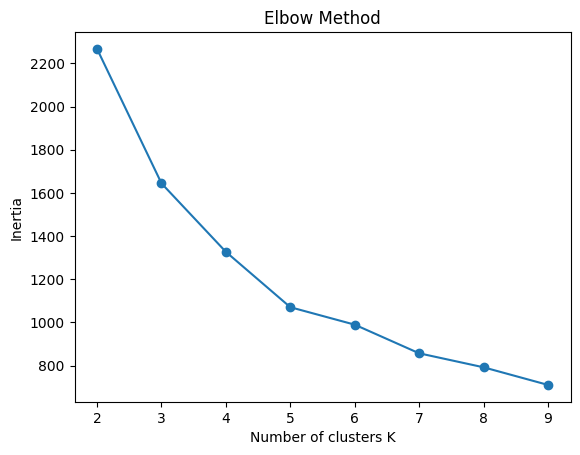

K=2, Silhouette Score=0.400
K=3, Silhouette Score=0.458
K=4, Silhouette Score=0.349
K=5, Silhouette Score=0.369
K=6, Silhouette Score=0.276
K=7, Silhouette Score=0.277
K=8, Silhouette Score=0.324
K=9, Silhouette Score=0.295


In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Elbow method
inertia = []
K_range = range(2, 10)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters K")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Silhouette Score
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette Score={score:.3f}")


In [45]:
df['Cluster'] = kmeans.labels_
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


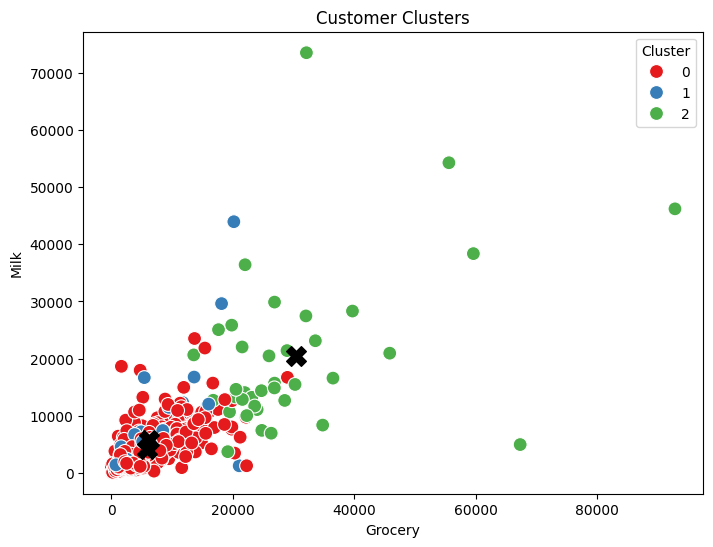

In [46]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Grocery'], y=df['Milk'],
    hue=df['Cluster'], palette='Set1', s=100
)

# Plot cluster centers (unscaled)
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 2], centers[:, 1], c='black', s=200, marker='X') # Grocery vs Milk
plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.title('Customer Clusters')
plt.show()


In [47]:
cluster_profile = df.groupby('Cluster')[features].mean()
print(cluster_profile)


                Fresh          Milk       Grocery       Frozen  \
Cluster                                                          
0         8935.500000   4228.528571   5848.034286  2167.231429   
1        34540.113208   5860.358491   6122.622642  9841.735849   
2         8704.864865  20534.405405  30466.243243  1932.621622   

         Detergents_Paper   Delicassen  
Cluster                                 
0             1913.605714  1102.120000  
1              981.471698  3664.245283  
2            14758.837838  2459.351351  


In [48]:
# Different random state
kmeans2 = KMeans(n_clusters=3, random_state=99)
df['Cluster2'] = kmeans2.fit_predict(X_scaled)

# Compare clusters
print((df['Cluster'] != df['Cluster2']).sum(), "customers changed clusters")


57 customers changed clusters
